In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = 'INFLUD-23-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', encoding='ISO-8859-1', error_bad_lines=False)

c:\users\laura\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (18,59,61,62,63,103,105,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(326193, 134)

In [4]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'DT_DIGITA', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM',
       'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO'],
      dtype='object', length=134)

In [5]:
dicionario_raça = {1:'Branca', 2:'Preta', 3:'Amarela',4:'Parda', 5:'Indígena', 9:'Ignorado'}

In [7]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: dicionario_raça[x])

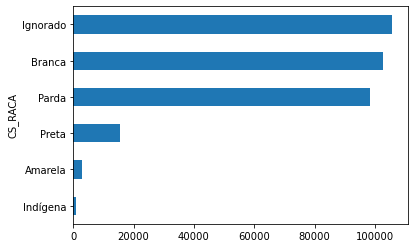

In [8]:
df.groupby('CS_RACA').size().sort_values().tail(6).plot(kind='barh')

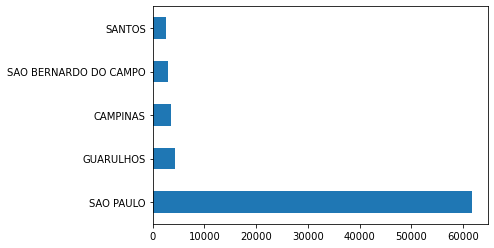

In [9]:
df.query('SG_UF_NOT == "SP"')['ID_MUNICIP'].value_counts().head().plot(kind='barh')

In [10]:
df.sample(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
132125,12/05/2020,20,05/05/2020,19,ES,METROPOLITANA,1510.0,VILA VELHA,320520,HOSPITAL EVANGELICO DE VILA VELHA,2494442,F,02/10/1928,91,3,3091,5,Ignorado,NaN,NaN,BRASIL,1,ES,METROPOLITANA,1510.0,VILA VELHA,320520.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,SARS COV 2,5.0,00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,2.0,17/05/2020,14/05/2020,13/05/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
132962,21/04/2020,17,17/04/2020,16,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,UNIDADE PRONTO ATENDIMENTO MESSEJANA,7006810,M,24/04/1956,63,3,3063,6,Parda,NaN,9.0,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,02/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,2.0,25/04/2020,13/05/2020,13/05/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
261215,11/06/2020,24,06/06/2020,23,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA MARCELINA SAO PAULO,2077477,M,03/09/2001,18,3,3018,6,Branca,NaN,9.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,1.0,13/06/2020,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,13/06/2020,16/06/2020,11/06/2020,0,NaN,NaN,NaN,00000000,00000000,1.0,NaN,NaN
241938,05/06/2020,23,30/05/2020,22,SP,GVE VIII MOGI DAS CRUZES,1333.0,FERRAZ DE VASCONCELOS,351570,HOSPITAL DR OSIRIS FLORINDO COELHO FERRAZ DE V...,2080079,F,18/10/1985,34,3,3034,9,Ignorado,NaN,NaN,BRASIL,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,POA,353980.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00000000,00000000,08/06/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
321436,23/06/2020,26,21/06/2020,26,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,CATANDUVA,351110,HOSP ESCOLA EMILIO CARLOS CATANDUVA,2089335,M,17/01/1935,85,3,3085,6,Branca,NaN,3.0,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,PIRANGI,353900.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,5.0,00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00000000,00000000,23/06/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
174277,21/05/2020,21,20/05/2020,21,PR,15RS MARINGA,1369.0,MARINGA,411520,HOSPITAL E MATERNIDADE MARINGA,2587343,F,08/12/1935,84,3,3084,5,Branca,NaN,1.0,BRASIL,1,PR,15RS MARINGA,1369.0,MARINGA,411520.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,25/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,00000000,00000000,23/05/2020,2,NaN,NaN,NaN,00000000,00000000,NaN,NaN,NaN
112806,02/04/2020,14,28/03/2020,13,PR,17RS LONDRINA,1371.0,LONDRINA,411370,HOSPITAL DOUTOR EULALINO IGNACIO DE ANDRADE HZS,2577763,F,14/05/1941,78,3,3078,5,Branca,NaN,9.0,BRASIL,1,PR,17RS LONDRINA,1371.0,LONDRINA,411370.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,2.0,29/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [11]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"')['ID_MUNICIP'].value_counts().head()

SAO JOSE DOS CAMPOS    1481
Name: ID_MUNICIP, dtype: int64

In [12]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"')['CS_SEXO'].value_counts().head()


M    811
F    670
Name: CS_SEXO, dtype: int64

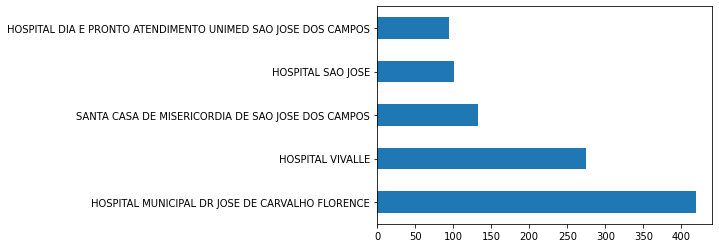

In [13]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"')['ID_UNIDADE'].value_counts().head().plot(kind='barh')

In [14]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"')['ID_UNIDADE'].value_counts().head()

HOSPITAL MUNICIPAL DR JOSE DE CARVALHO FLORENCE                 419
HOSPITAL VIVALLE                                                274
SANTA CASA DE MISERICORDIA DE SAO JOSE DOS CAMPOS               133
HOSPITAL SAO JOSE                                               101
HOSPITAL DIA E PRONTO ATENDIMENTO UNIMED SAO JOSE DOS CAMPOS     94
Name: ID_UNIDADE, dtype: int64

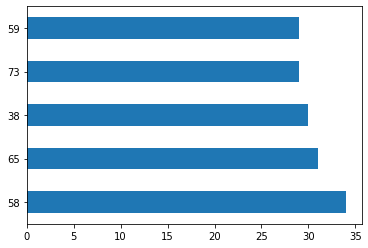

In [15]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"')['NU_IDADE_N'].value_counts().head().plot(kind='barh')

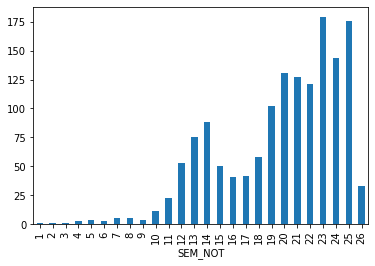

In [16]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS"').groupby('SEM_NOT').size().plot(kind='bar')